In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
# from sklearn.cluster import AgglomerativeClusterin

In [2]:
df = pd.read_csv('../../Data/OutsideData/datestimes_for_Kmeans.csv')
df.head()

,Unnamed: 0,Index,MinistryMonthlyBudgetAmount,StartDate,EndDate,Marital_Status,Number_of_Household_Members,City,State,PostalCode,Country,Coded_Marital_Status,Address,Latitude,Longitude,Mnths_Passed
0,0,0,5485,2013-03-01,2013-12-31,Married,2,Erlanger,KY,41018,United States of America,2.0,"Erlanger, KY, United States of America",39.013755,-84.602290,9.0
1,1,1,4454,2011-11-01,2012-04-30,Married,2,Spanish Fort,AL,36527,United States of America,2.0,"Spanish Fort, AL, United States of America",30.668757,-87.939710,5.0
2,3,2,767,2013-01-01,2013-12-31,Single,1,Lexington,KY,40517,United States of America,4.0,"Lexington, KY, United States of America",38.037847,-84.616450,11.0
3,53,3,6368,2015-07-01,2016-02-29,Married,2,Manheim,PA,17545,United States of America,2.0,"Manheim, PA, United States of America",40.168294,-76.412300,7.0
4,54,4,1919,2011-08-01,2012-07-31,Divorced,1,Jacksonville,FL,32258-5434,United States of America,1.0,"Jacksonville, FL, United States of America",30.344940,-81.683107,11.0


In [3]:
df = df.drop(columns=['Unnamed: 0', 'Country'], axis=1)

In [4]:
df['StartDate'] =  pd.to_datetime(df['StartDate'])
df['EndDate'] =  pd.to_datetime(df['EndDate'])

In [5]:
# df['Address'].value_counts()

In [6]:
# labels = df['Address'].astype('category').cat.categories.tolist()
# replace_map_mstatus = {'Address' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
# replace_map_mstatus

In [7]:
# df['Coded_Address'] = df['Index'].map(replace_map_mstatus)

Need to find positioning of the initial centroids first so the algorithm can find convergence. Draw a sample from this dataset

In [8]:
sample_df = df[(df['Index'] % 10) == 0]
sample_df.shape

(842, 14)

In [9]:
sample_df.isnull().sum()

Index                          0
MinistryMonthlyBudgetAmount    0
StartDate                      0
EndDate                        0
Marital_Status                 0
Number_of_Household_Members    0
City                           0
State                          0
PostalCode                     0
Coded_Marital_Status           0
Address                        0
Latitude                       0
Longitude                      0
Mnths_Passed                   0
dtype: int64

In [10]:
sample_df = sample_df.drop_duplicates()
sample_df.shape

(842, 14)

Scale values so they all have equal importance, and distance between points is not affected

In [11]:
df.info() # filter out the non numerical values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8498 entries, 0 to 8497
Data columns (total 14 columns):
Index                          8498 non-null int64
MinistryMonthlyBudgetAmount    8498 non-null int64
StartDate                      8498 non-null datetime64[ns]
EndDate                        8498 non-null datetime64[ns]
Marital_Status                 8498 non-null object
Number_of_Household_Members    8498 non-null int64
City                           8498 non-null object
State                          8498 non-null object
PostalCode                     8498 non-null object
Coded_Marital_Status           8498 non-null float64
Address                        8498 non-null object
Latitude                       8498 non-null float64
Longitude                      8498 non-null float64
Mnths_Passed                   8498 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 929.6+ KB


In [41]:
numerical_df = sample_df.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(columns=['StartDate', 'EndDate', 'Coded_Marital_Status'], axis=1)
numerical_df.head()

,Index,MinistryMonthlyBudgetAmount,Number_of_Household_Members,Latitude,Longitude,Mnths_Passed
0,0,5485,2,39.013755,-84.602290,9.0
9,10,5459,2,40.964111,-81.689610,22.0
19,20,5827,2,32.767268,-96.777626,2.0
28,30,3816,1,43.069560,-89.423861,6.0
38,40,1942,2,33.857423,-83.718990,35.0


In [42]:
X = StandardScaler().fit_transform(numerical_df)
X

array([[-1.72663956,  0.42279194,  0.39578689,  0.44545611,  0.61652424,
        -0.38178957],
       [-1.72272861,  0.40879543,  0.39578689,  0.81696416,  0.81337488,
         1.26805986],
       [-1.71881767,  0.60689977,  0.39578689, -0.74438833, -0.20633394,
        -1.27017003],
       ...,
       [ 1.74236694, -1.17873093, -2.47708003, -0.25313156,  0.89099661,
        -0.12796658],
       [ 1.74627788,  0.41310205,  0.39578689, -0.74438833, -0.20633394,
        -0.12796658],
       [ 1.75018882,  2.86248997,  0.39578689,  1.94290906, -1.6006987 ,
        -0.12796658]])

In [43]:
# set number of clusters at initialization time to 12
k_means = KMeans(n_clusters=12)

#Run the clustering algorithm
model = k_means.fit(X)
model

#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)
# y_hat.shape
# X.shape
# model

In [44]:
# calculate silhouette coefficient
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.2127282732232686

In [45]:
# calculate the CH score
metrics.calinski_harabasz_score(X, labels)

155.45880059477938

In [46]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

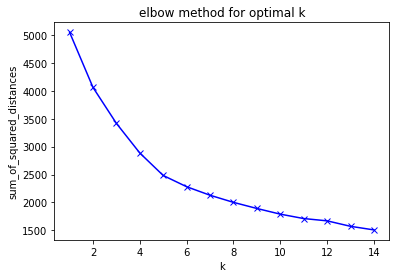

In [47]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [48]:
# set number of clusters at initialization time to 12
k_means = KMeans(n_clusters=5)

#Run the clustering algorithm
model = k_means.fit(X)
model

#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')
metrics.calinski_harabasz_score(X, labels)

216.4342853474652

In [49]:
centers =  X
# centers = y_hat

In [50]:
#function that creates a dataframe with a column for cluster number
def pd_centers(cols_of_interest, centers):
        colNames = list(cols_of_interest)
        colNames.append('prediction')
# Zip with a column called 'prediction' (index)
        Z = [np.append(A, index) for index, A in enumerate(centers)]
# Convert to pandas data frame for plotting
        P = pd.DataFrame(Z, columns=colNames)
        P['prediction'] = P['prediction'].astype(int)
        return P
P = pd_centers(numerical_df, centers)
P

,Index,MinistryMonthlyBudgetAmount,Number_of_Household_Members,Latitude,Longitude,Mnths_Passed,prediction
0,-1.726640,0.422792,0.395787,0.445456,0.616524,-0.381790,0
1,-1.722729,0.408795,0.395787,0.816964,0.813375,1.268060,1
2,-1.718818,0.606900,0.395787,-0.744388,-0.206334,-1.270170,2
3,-1.714907,-0.475676,-2.477080,1.218015,0.290663,-0.762524,3
4,-1.710996,-1.484501,0.395787,-0.536733,0.676221,2.917909,4
...,...,...,...,...,...,...,...
837,1.734545,0.710259,0.395787,1.534788,0.029435,-0.127967,837
838,1.738456,1.044021,0.395787,-1.322328,-0.115344,2.917909,838
839,1.742367,-1.178731,-2.477080,-0.253132,0.890997,-0.127967,839
840,1.746278,0.413102,0.395787,-0.744388,-0.206334,-0.127967,840


In [51]:
type(P)

pandas.core.frame.DataFrame